In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from DCM_region_model import Sigmodal
from DCM_region_model import DCM_Region
cwd= os.getcwd()
cwd

'/Users/cyprien/Desktop/Stage  M1/Code perso '

In [8]:
# Time series parameters
tend = 200.0
dt=0.1
t0=0.0

ts = np.arange(t0, tend + dt, dt) # Time series array 
nt=ts.shape[0]
nn=9 
x_init=np.zeros((nn)) # Initial condition of every equations

# Parameter of the neuronal population
# intrinsic connexion
g_1=0.42 
g_2=0.76
g_3=0.15
g_4=0.16
tau_e=5.77
h_e=1.63
h_i=27.87
tau_i=7.77

# Input parameter 
stim_init=np.round(ts.shape[0]*0.1) # in ms 
stim_dur=40 # in ms
u=3.94 # Model the afferent connexion  

delta=12.13
alpha=-0.56 # Constante permet de definir la forme de la sigmoïde 


constants = np.array([g_1, g_2, g_3, g_4, delta, tau_i, h_i, tau_e, h_e, alpha])
input_par = np.array([stim_init,stim_dur,u])
#theta_region = np.hstack((linear_matrix,input_par))

In [9]:
loadpath=os.path.join(cwd + "/" + "matrix", "Forward_3_region.npy")
thetaF=np.load(loadpath)
nr=thetaF.shape[2]
thetaF=thetaF.reshape(-1)*10

In [10]:
region,stim_par=DCM_Region(thetaF,constants,x_init,.0,0,dt,ts,input_par)
region=region.reshape(nr,nn,nt)
start_stim=int(stim_par[0]-1)
end_stim=int(stim_par[1]+1)
Stim=stim_par[3:]

TypeError: 'float' object is not subscriptable

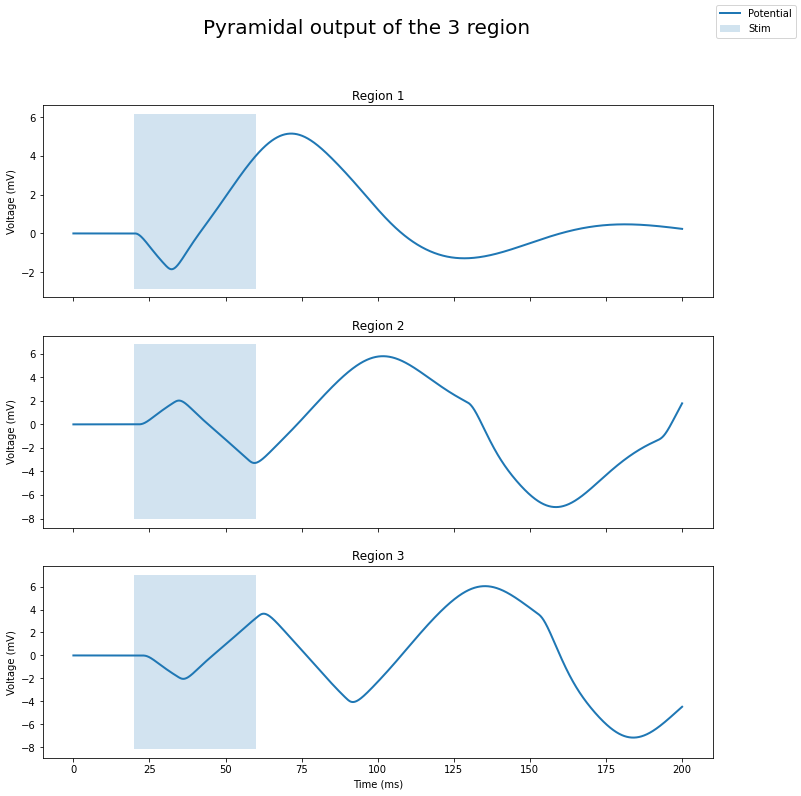

In [7]:

fig ,ax = plt.subplots(region.shape[0],1,figsize=(12,4*3),sharex=True)
for i in range(region.shape[0]):
    ax[i].plot(ts,region[i,8,:],lw=2)
    ax[i].fill_between(ts[start_stim:end_stim],(max(region[i,8,:]+1)),(min(region[i,8,:]-1)),alpha=.2,label="Stim")
    ax[i].set_title(f"Region {i+1}")
    ax[i].set_ylabel("Voltage (mV)")
ax[i].set_xlabel("Time (ms)")
fig.suptitle("Pyramidal output of the 3 region",fontsize=20)
fig.legend(labels=["Potential","Stim"])
plt.show()

In [ ]:
np.corrcoef(region[0,8,:1551],region[2,8,450:])

In [ ]:
np.corrcoef(region[1,8,:1701],region[2,8,300:])

In [ ]:
np.corrcoef(region[1,8,:],region[2,8,:])

### Forward backward connectivity 

In [ ]:
loadpath=os.path.join(cwd + "/" + "matrix", "Forward_backward_3_region.npy")
thetaFB=np.load(loadpath)
nr=thetaFB.shape[2]
thetaFB=thetaFB.reshape(-1)

In [ ]:
region,stim_par=DCM_Region(thetaFB,constants,x_init,0.001,1,dt,ts,input_par)
region=region.reshape(nr,nn,nt)
start_stim=int(stim_par[0]-1)
end_stim=int(stim_par[1]+1)
Stim=stim_par[3:]
fig ,ax = plt.subplots(region.shape[0],1,figsize=(12,4*3),sharex=True)
for i in range(region.shape[0]):
    ax[i].plot(ts,region[i,8,:],lw=2)
    ax[i].fill_between(ts[start_stim:end_stim],(max(region[i,8,:]+1)),(min(region[i,8,:]-1)),alpha=.2,label="Stim")
    ax[i].set_title(f"Region {i+1}")
    ax[i].set_ylabel("Voltage (mV)")
ax[i].set_xlabel("Time (ms)")
fig.suptitle("Pyramidal output of the 3 region",fontsize=20)
fig.legend(labels=["Potential","Stim"])
plt.show()

### Forward backward lateral connectivity 

In [ ]:
loadpath=os.path.join(cwd + "/" + "matrix", "Forward_backward_lateral_3_region.npy")
thetaFBL=np.load(loadpath)
nr=thetaFBL.shape[2]
thetaFBL=thetaFBL.reshape(-1)

region,stim_par=DCM_Region(thetaFBL,constants,x_init,0.001,1,dt,ts,input_par)
region=region.reshape(nr,nn,nt)
start_stim=int(stim_par[0]-1)
end_stim=int(stim_par[1]+1)
Stim=stim_par[3:]
fig ,ax = plt.subplots(region.shape[0],1,figsize=(12,4*3),sharex=True)
for i in range(region.shape[0]):
    ax[i].plot(ts,region[i,8,:],lw=2)
    ax[i].fill_between(ts[start_stim:end_stim],(max(region[i,8,:]+1)),(min(region[i,8,:]-1)),alpha=.2,label="Stim")
    ax[i].set_title(f"Region {i+1}")
    ax[i].set_ylabel("Voltage (mV)")
ax[i].set_xlabel("Time (ms)")
fig.suptitle("Pyramidal output of the 3 region",fontsize=20)
fig.legend(labels=["Potential","Stim"])
plt.show()

### Model with a non-zero matrix :

In [ ]:
theta_full=np.ones((3,10,10))*0



theta_full[1,2,3]=10
theta_full[1,4,0]=10

nr=theta_full.shape[1]
theta_full=theta_full.reshape(-1)


region,stim_par=DCM_Region(theta_full,constants,x_init,0,0,dt,ts,input_par)
region=region.reshape(nr,nn,nt)
start_stim=int(stim_par[0]-1)
end_stim=int(stim_par[1]+1)
Stim=stim_par[3:]
fig ,ax = plt.subplots(region.shape[0],1,figsize=(12,8*3),sharex=True)
for i in range(region.shape[0]):
    ax[i].plot(ts,region[i,8,:],lw=2)
    ax[i].fill_between(ts[start_stim:end_stim],(max(region[i,8,:]+1)),(min(region[i,8,:]-1)),alpha=.2,label="Stim")
    ax[i].set_title(f"Region {i+1}")
    ax[i].set_ylabel("Voltage (mV)")
ax[i].set_xlabel("Time (ms)")
fig.suptitle("Pyramidal output of the 3 region",fontsize=20)
fig.legend(labels=["Potential","Stim"])
plt.show()

### Trial for the complete DCM region function
#### With differentes constantes values through regions 

In [11]:
constants=np.zeros((10,3))
g_1=0.42 
g_2=0.76
g_3=0.15
g_4=0.16
tau_e=5.77
h_e=1.63
h_i=27.87
tau_i=7.77
alpha=-0.56
delta=12.13
zz=np.array([g_1, g_2, g_3, g_4, delta, tau_i, h_i, tau_e, h_e, alpha])
zz=zz.reshape(10)
constants[:,0]=zz
constants[:,1]=zz
constants[:,2]=zz
constants

array([[ 0.42,  0.42,  0.42],
       [ 0.76,  0.76,  0.76],
       [ 0.15,  0.15,  0.15],
       [ 0.16,  0.16,  0.16],
       [12.13, 12.13, 12.13],
       [ 7.77,  7.77,  7.77],
       [27.87, 27.87, 27.87],
       [ 5.77,  5.77,  5.77],
       [ 1.63,  1.63,  1.63],
       [-0.56, -0.56, -0.56]])

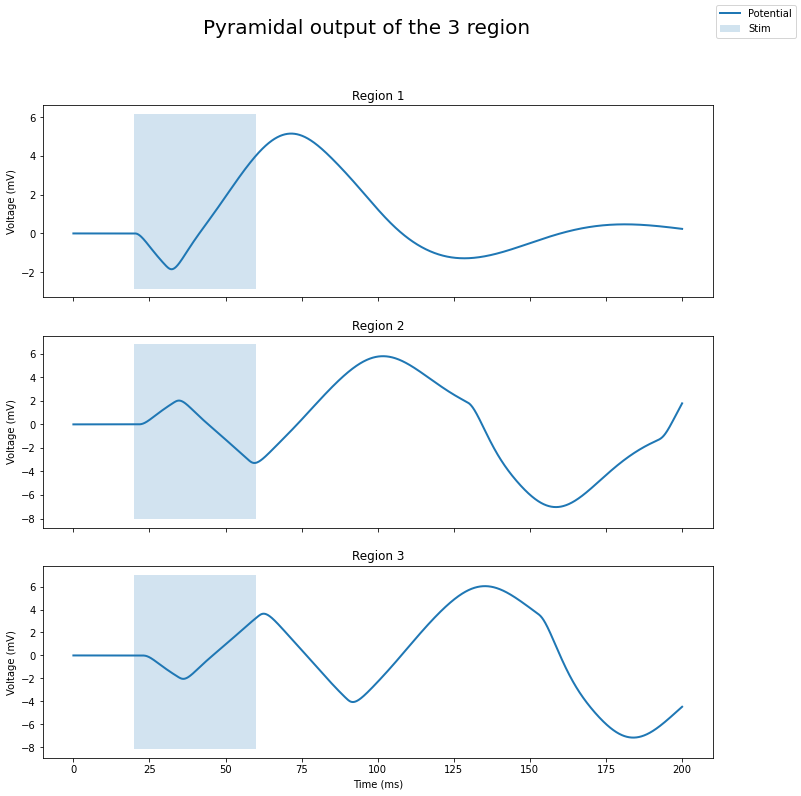

In [12]:
region,stim_par=DCM_Region(thetaF,constants,x_init,0,0,dt,ts,input_par,default=False)
region=region.reshape(nr,nn,nt)
start_stim=int(stim_par[0]-1)
end_stim=int(stim_par[1]+1)
Stim=stim_par[3:]
fig ,ax = plt.subplots(region.shape[0],1,figsize=(12,4*3),sharex=True)
for i in range(region.shape[0]):
    ax[i].plot(ts,region[i,8,:],lw=2)
    ax[i].fill_between(ts[start_stim:end_stim],(max(region[i,8,:]+1)),(min(region[i,8,:]-1)),alpha=.2,label="Stim")
    ax[i].set_title(f"Region {i+1}")
    ax[i].set_ylabel("Voltage (mV)")
ax[i].set_xlabel("Time (ms)")
fig.suptitle("Pyramidal output of the 3 region",fontsize=20)
fig.legend(labels=["Potential","Stim"])
plt.show()